In [1]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector as selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2025-03-17 19:28:21.660269: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-17 19:28:21.664930: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-17 19:28:21.681506: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742239701.709203   14512 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742239701.716767   14512 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-17 19:28:21.749110: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [23]:
import pandas as pd
df= pd.read_csv("./data/students_grading.csv")

In [24]:
df.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


In [25]:
df.dtypes

Student_ID                     object
First_Name                     object
Last_Name                      object
Email                          object
Gender                         object
Age                             int64
Department                     object
Attendance (%)                float64
Midterm_Score                 float64
Final_Score                   float64
Assignments_Avg               float64
Quizzes_Avg                   float64
Participation_Score           float64
Projects_Score                float64
Total_Score                   float64
Grade                          object
Study_Hours_per_Week          float64
Extracurricular_Activities     object
Internet_Access_at_Home        object
Parent_Education_Level         object
Family_Income_Level            object
Stress_Level (1-10)             int64
Sleep_Hours_per_Night         float64
dtype: object

In [26]:
df.isna().sum()/df.shape[0]

Student_ID                    0.0000
First_Name                    0.0000
Last_Name                     0.0000
Email                         0.0000
Gender                        0.0000
Age                           0.0000
Department                    0.0000
Attendance (%)                0.1032
Midterm_Score                 0.0000
Final_Score                   0.0000
Assignments_Avg               0.1034
Quizzes_Avg                   0.0000
Participation_Score           0.0000
Projects_Score                0.0000
Total_Score                   0.0000
Grade                         0.0000
Study_Hours_per_Week          0.0000
Extracurricular_Activities    0.0000
Internet_Access_at_Home       0.0000
Parent_Education_Level        0.3588
Family_Income_Level           0.0000
Stress_Level (1-10)           0.0000
Sleep_Hours_per_Night         0.0000
dtype: float64

In [27]:
df.select_dtypes(include=['object']).nunique()

Student_ID                    5000
First_Name                       8
Last_Name                        6
Email                         5000
Gender                           2
Department                       4
Grade                            5
Extracurricular_Activities       2
Internet_Access_at_Home          2
Parent_Education_Level           4
Family_Income_Level              3
dtype: int64

In [28]:
df.select_dtypes(include=['object']).columns

Index(['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender',
       'Department', 'Grade', 'Extracurricular_Activities',
       'Internet_Access_at_Home', 'Parent_Education_Level',
       'Family_Income_Level'],
      dtype='object')

In [29]:
for col in df.select_dtypes(include=['object']).columns:
    if df[col].nunique() < 10:
        print(f"{col:-<50}: {df[col].unique()}")

First_Name----------------------------------------: ['Omar' 'Maria' 'Ahmed' 'John' 'Liam' 'Sara' 'Emma' 'Ali']
Last_Name-----------------------------------------: ['Williams' 'Brown' 'Jones' 'Smith' 'Davis' 'Johnson']
Gender--------------------------------------------: ['Female' 'Male']
Department----------------------------------------: ['Engineering' 'Business' 'Mathematics' 'CS']
Grade---------------------------------------------: ['F' 'A' 'D' 'B' 'C']
Extracurricular_Activities------------------------: ['No' 'Yes']
Internet_Access_at_Home---------------------------: ['Yes' 'No']
Parent_Education_Level----------------------------: ['High School' nan "Master's" 'PhD' "Bachelor's"]
Family_Income_Level-------------------------------: ['Medium' 'Low' 'High']


In [30]:
# encode theTarget "Grade" column
df['Grade'] = df['Grade'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'F': 4})


In [31]:
# drop StudentID, Firstname, email , lastname 
X=df.drop(columns=["Student_ID", "First_Name", "Last_Name", "Email", "Grade"], axis=1)
y=df["Grade"]

In [32]:
# Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [33]:
categorical_features= X.select_dtypes(exclude="number").columns
numeric_features= X.select_dtypes("number").columns


In [34]:
# install imblearn
!pip install imbalanced-learn

In [35]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=True, drop='first'))])

In [36]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [37]:
# Applying the preprocessing pipeline
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [43]:

# Handle imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
# Neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau
num_classes = len(np.unique(y_train))

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
# Learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

In [45]:
# Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [46]:

# Training the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), callbacks=[reduce_lr])

Epoch 1/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2341 - loss: 1.8844 - val_accuracy: 0.2940 - val_loss: 1.4851 - learning_rate: 0.0010
Epoch 2/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3034 - loss: 1.5227 - val_accuracy: 0.3420 - val_loss: 1.4132 - learning_rate: 0.0010
Epoch 3/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3325 - loss: 1.4642 - val_accuracy: 0.3500 - val_loss: 1.3820 - learning_rate: 0.0010
Epoch 4/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3385 - loss: 1.4180 - val_accuracy: 0.3400 - val_loss: 1.3826 - learning_rate: 0.0010
Epoch 5/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3262 - loss: 1.4235 - val_accuracy: 0.3450 - val_loss: 1.3785 - learning_rate: 0.0010
Epoch 6/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3321 - loss: 1.4136 - val_accuracy: 0.3320 - val_loss: 1.3733 - learning_rate: 0.0010
Epoch 7/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3300 - loss: 1.

In [47]:
# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3953 - loss: 1.3201 
Test Accuracy: 34.90%


In [48]:
# Make predictions (get the predicted classes)
y_pred_probs = model.predict(X_test)  # Get probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class predictions

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [49]:
# Calculate metrics
from sklearn.metrics import classification_report, recall_score, f1_score

report = classification_report(y_test, y_pred)
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')

In [50]:
# Print metrics

print("Classification Report:\n", report)
print("Recall (Macro):", recall_macro)
print("F1-score (Macro):", f1_macro)

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.45      0.54       299
           1       0.25      0.27      0.26       195
           2       0.25      0.26      0.25       159
           3       0.29      0.39      0.33       178
           4       0.28      0.30      0.29       169

    accuracy                           0.35      1000
   macro avg       0.35      0.33      0.33      1000
weighted avg       0.38      0.35      0.36      1000

Recall (Macro): 0.3337586795163496
F1-score (Macro): 0.3342786441615812


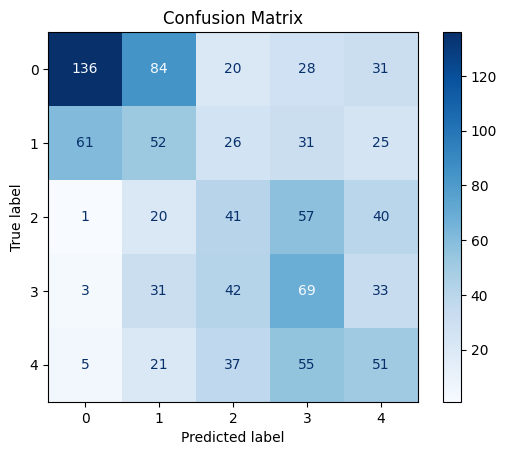

In [52]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3, 4])

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

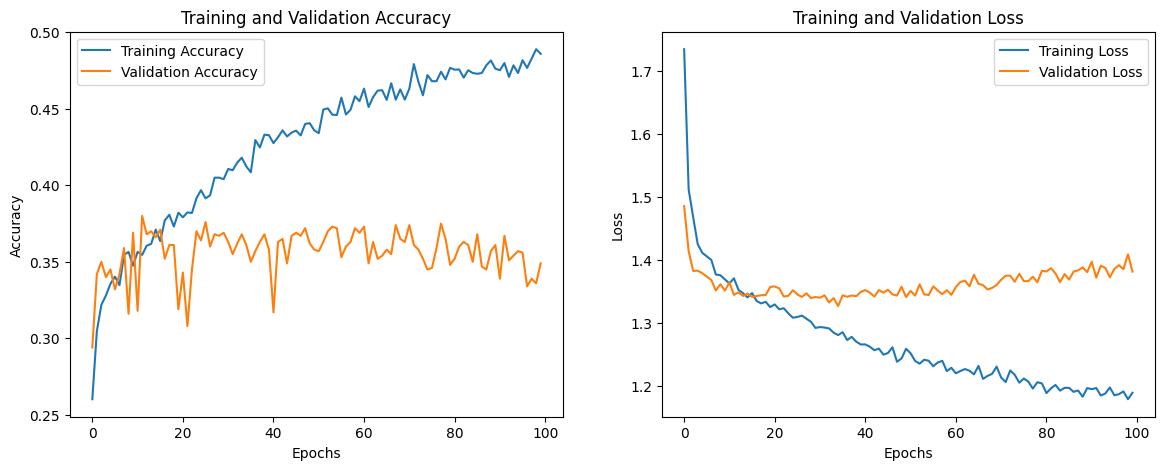

In [53]:
# Plotting training and validation metrics
plt.figure(figsize=(14, 5))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [68]:
df.shape

(5000, 23)

In [55]:
# Neural network model
from tensorflow.keras.layers import Input

num_classes = len(np.unique(y_train))

model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Input layer
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [58]:
# Learning rate scheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=10,
                               restore_best_weights=True)

In [59]:
# Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [60]:
# Training the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16,
                    validation_data=(X_test, y_test),
                    callbacks=[reduce_lr, early_stopping])

Epoch 1/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2334 - loss: 1.8287 - val_accuracy: 0.3350 - val_loss: 1.4250 - learning_rate: 0.0010
Epoch 2/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2977 - loss: 1.5136 - val_accuracy: 0.3380 - val_loss: 1.3855 - learning_rate: 0.0010
Epoch 3/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3101 - loss: 1.4695 - val_accuracy: 0.3660 - val_loss: 1.3585 - learning_rate: 0.0010
Epoch 4/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3315 - loss: 1.4319 - val_accuracy: 0.3580 - val_loss: 1.3507 - learning_rate: 0.0010
Epoch 5/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3389 - loss: 1.4032 - val_accuracy: 0.3600 - val_loss: 1.3615 - learning_rate: 0.0010
Epoch 6/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3386 - loss: 1.4026 - val_accuracy: 0.3510 - val_loss: 1.3586 - learning_rate: 0.0010
Epoch 7/100
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3535 - loss: 1.

In [61]:
# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4025 - loss: 1.3036 
Test Accuracy: 38.00%


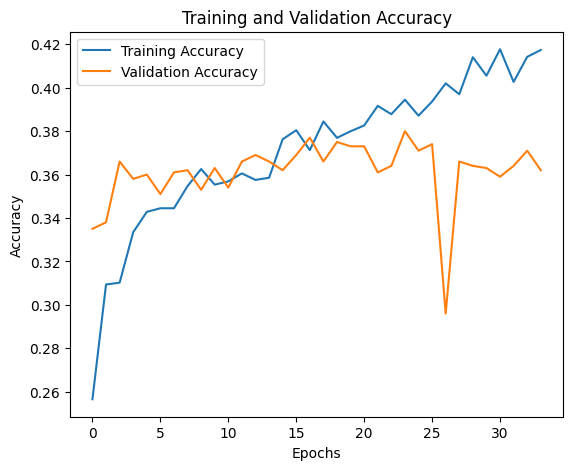

In [62]:
# Plotting training and validation metrics
plt.figure(figsize=(14, 5))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

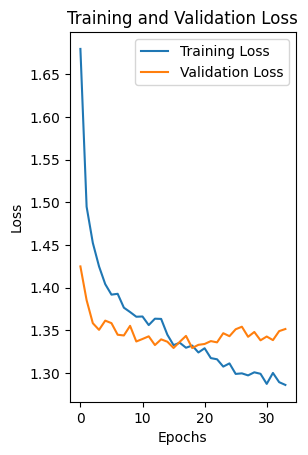

In [63]:
# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [64]:
# Make predictions (get the predicted classes)
y_pred_probs = model.predict(X_test)  # Get probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class predictions

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [65]:
# Calculate metrics
from sklearn.metrics import classification_report, recall_score, f1_score

report = classification_report(y_test, y_pred)
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')

In [66]:
# Print metrics

print("Classification Report:\n", report)
print("Recall (Macro):", recall_macro)
print("F1-score (Macro):", f1_macro)

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.63      0.65       299
           1       0.25      0.14      0.18       195
           2       0.24      0.30      0.27       159
           3       0.31      0.46      0.37       178
           4       0.23      0.22      0.23       169

    accuracy                           0.38      1000
   macro avg       0.34      0.35      0.34      1000
weighted avg       0.38      0.38      0.38      1000

Recall (Macro): 0.3479514964265844
F1-score (Macro): 0.3384407094849432


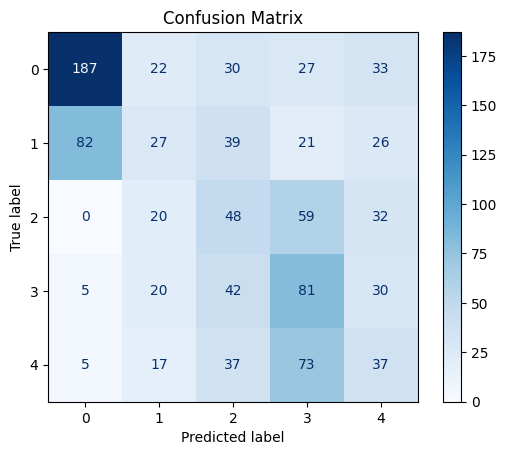

In [67]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3, 4])

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [81]:
# Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from collections import Counter
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import cross_val_score


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=True, drop='first'))])
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Handle imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)



# Hyperparameter tuning with XGBoost
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
xgb = XGBClassifier( eval_metric='mlogloss')
search = RandomizedSearchCV(xgb, param_grid, cv=5, scoring='f1_macro', n_jobs=-1, random_state=42)
search.fit(X_train, y_train)

# Evaluate
y_pred = search.predict(X_test)
print("Best Parameters:", search.best_params_)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Cross-validation
cv_scores = cross_val_score(search.best_estimator_, X_train, y_train, cv=5, scoring='f1_macro')
print(f"Cross-Validation F1 Macro: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")

Best Parameters: {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1}
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.59      0.59       299
           1       0.22      0.16      0.19       195
           2       0.17      0.16      0.17       159
           3       0.25      0.28      0.26       178
           4       0.23      0.28      0.25       169

    accuracy                           0.33      1000
   macro avg       0.29      0.30      0.29      1000
weighted avg       0.33      0.33      0.33      1000

Cross-Validation F1 Macro: 0.59 (+/- 0.26)


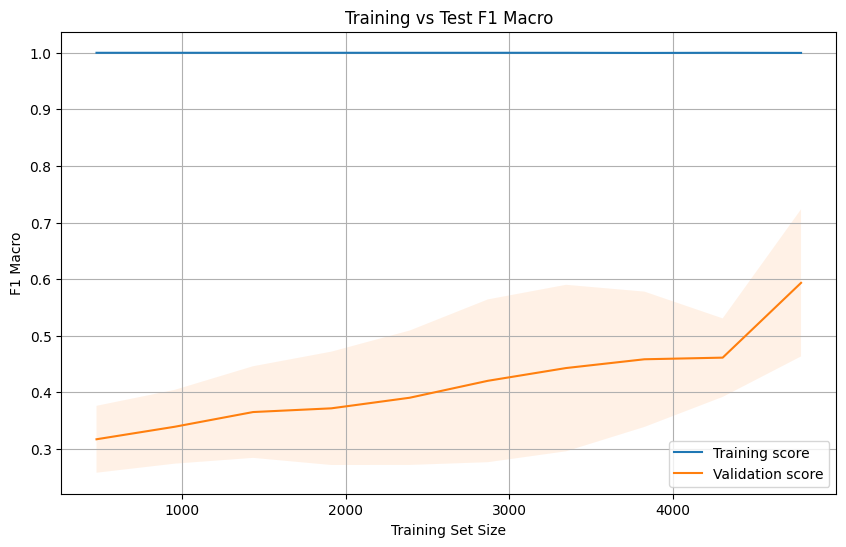

In [83]:
from plot_utils import plot_learning_curve  # Assuming this is fixed
plot_learning_curve(search.best_estimator_, X_train, y_train, scoring="f1_macro", cv=5, title="Training vs Test F1 Macro")



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Predict on test set
y_pred = search.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
grade_labels = ['A', 'B', 'C', 'D', 'F']  # Map 0-4 to A-F for display

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=grade_labels, yticklabels=grade_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Grade Prediction')
plt.show()